# Python 1 Workshop (Instructor Version)

Now that most of you have learned the basics of Python (variables, types, strings, data structures, loops, and functions) from our Python 0 workshop, we are ready to dive in to some more advanced Python topics. In this workshop we will learn how to use Python for data science, and introduce you to the basics of data science in Python. 

# Data Science Tutorial
Now that we've covered some Python basics, we will begin a tutorial going through many tasks a data scientist may perform.  We will obtain real world data and go through the process of auditing, analyzing, visualing, and building classifiers from the data.

For more information on this data set:
http://apps.who.int/gho/data/node.home

## Obtaining the Data
Lets begin by programmatically obtaining the data.  Here I'll define a function we can use to make HTTP requests and download the data

In [523]:
def download_file(url, local_filename):
    import requests
    
    # stream = True allows downloading of large files; prevents loading entire file into memory
    r = requests.get(url, stream = True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()

Now we'll specify the url of the file and the file name we will save to

In [524]:
url = 'https://raw.githubusercontent.com/dsiufl/Python-Workshops/master/humanresource.csv'
filename = 'humanresource.csv'

And make a call to <code>download_file</code>

In [525]:
download_file(url, filename)

**Note:**  If you see an InsecurePlatformWarning message, ignore it. More info can be found here: https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning

Now this might seem like overkill for downloading a single, small csv file, but we can use this same function to access countless APIs available on the World Wide Web by building an API request in the url.

## Wrangling the Data
Now that we have some data, lets get it into a useful form.  For this task we will use a package called pandas. pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python.  The most fundamental data structure in pandas is the dataframe, which is similar to the data.frame data structure found in the R statistical programming language.

For more information: http://pandas.pydata.org

pandas dataframes are a 2-dimensional labeled data structures with columns of potentially different types.  Dataframes can be thought of as similar to a spreadsheet or SQL table.

There are numerous ways to build a dataframe with pandas.  Since we have already attained a csv file, we can use a parser built into pandas called <code>read_csv</code> which will read the contents of a csv file directly into a data frame.

For more information: http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html

In [526]:
import pandas as pd # import the module and alias it as pd

raw_health_data = pd.read_csv('humanresource.csv')
raw_health_data.head() # show the first few rows of the data

Unnamed: 0  Psychiatrists working in mental health sector (per 100,000)  \
0      Country                                            2014.00             
1  Afghanistan                                               0.01             
2      Albania                                               1.32             
3      Algeria                                               2.29             
4      Andorra                                               6.00             

   Psychiatrists working in mental health sector (per 100,000).1  \
0                                            2011.00               
1                                               0.16               
2                                               1.83               
3                                               1.55               
4                                               6.92               

   Nurses working in mental health sector (per 100,000)  \
0                                            2014.00      
1                                               0.11      
2                                               6.66      
3                                                NaN      
4                                                NaN      

   Nurses working in mental health sector (per 100,000).1  \
0                                            2011.00        
1                                               0.15        
2                                               6.18        
3                                               6.01        
4                                              10.38        

   Social workers working in mental health sector (per 100,000)  \
0                                            2014.00              
1                                               0.01              
2                                               0.79              
3                                               0.08              
4                                                NaN              

   Social workers working in mental health sector (per 100,000).1  \
0                                            2011.00                
1                                               0.01                
2                                               1.10                
3                                                NaN                
4                                               2.31                

   Psychologists working in mental health sector (per 100,000)  \
0                                            2014.00             
1                                               0.04             
2                                               1.01             
3                                               3.43             
4                                                NaN             

   Psychologists working in mental health sector (per 100,000).1  
0                                            2011.00              
1                                               0.08              
2                                               1.29              
3                                               4.26              
4                                              28.84

Lets take a look at some simple statistics for the **Psychiatrists working in mental health sector (per 100,000) column** for 2011.

In [527]:
raw_health_data.iloc[:,2].describe()

count     181.000000
mean       15.183039
std       149.321814
min         0.000000
25%         0.170000
50%         1.100000
75%         6.060000
max      2011.000000
Name: Psychiatrists working in mental health sector (per 100,000).1, dtype: float64

Wow! 6 Psychiatrists per 100,000 people was the 75th percentile of this data! When dealing with sets of data with different hierarchial categories, we will want to implement something called a MultiIndex table. They seem daunting at first, but after tinkering with them for a while you'll find they're very helpful in data cleaning and analysis. 

Read more here: http://pandas.pydata.org/pandas-docs/stable/advanced.html

In [528]:
# having countries as our columns will make extracting their values much easier
# it's much better writing the name of a country rather than the full title of the category when slicing!
# we will use a transpose function to visualize what we want
# you will soon see what the transpose function does (if you've taken linear algebra, you can take a guess)

transposed_health_data = raw_health_data.T
transposed_health_data.head(3)

0            1    \
Unnamed: 0                                          Country  Afghanistan   
Psychiatrists working in mental health sector (...     2014         0.01   
Psychiatrists working in mental health sector (...     2011         0.16   

                                                        2        3        4    \
Unnamed: 0                                          Albania  Algeria  Andorra   
Psychiatrists working in mental health sector (...     1.32     2.29        6   
Psychiatrists working in mental health sector (...     1.83     1.55     6.92   

                                                       5    \
Unnamed: 0                                          Angola   
Psychiatrists working in mental health sector (...     NaN   
Psychiatrists working in mental health sector (...    0.02   

                                                                    6    \
Unnamed: 0                                          Antigua and Barbuda   
Psychiatrists working in mental health sector (...                  NaN   
Psychiatrists working in mental health sector (...                 1.13   

                                                        7          8    \
Unnamed: 0                                          Armenia  Australia   
Psychiatrists working in mental health sector (...      5.9       9.16   
Psychiatrists working in mental health sector (...     4.04      12.76   

                                                        9      ...     \
Unnamed: 0                                          Austria    ...      
Psychiatrists working in mental health sector (...      NaN    ...      
Psychiatrists working in mental health sector (...    19.71    ...      

                                                                                                  177  \
Unnamed: 0                                          United Kingdom of Great Britain and Northern I...   
Psychiatrists working in mental health sector (...                                              14.63   
Psychiatrists working in mental health sector (...                                                NaN   

                                                                            178  \
Unnamed: 0                                          United Republic of Tanzania   
Psychiatrists working in mental health sector (...                         0.01   
Psychiatrists working in mental health sector (...                         0.04   

                                                                         179  \
Unnamed: 0                                          United States of America   
Psychiatrists working in mental health sector (...                      12.4   
Psychiatrists working in mental health sector (...                      7.79   

                                                        180         181  \
Unnamed: 0                                          Uruguay  Uzbekistan   
Psychiatrists working in mental health sector (...    16.91        2.68   
Psychiatrists working in mental health sector (...      NaN        3.37   

                                                        182       183    184  \
Unnamed: 0                                          Vanuatu  Viet Nam  Yemen   
Psychiatrists working in mental health sector (...     0.39      0.91    NaN   
Psychiatrists working in mental health sector (...        0      1.01   0.21   

                                                       185       186  
Unnamed: 0                                          Zambia  Zimbabwe  
Psychiatrists working in mental health sector (...    0.05      0.08  
Psychiatrists working in mental health sector (...    0.03      0.06  

[3 rows x 187 columns]

Almost there! Now the values of our first row have to become our column names so we can slice with them.

In [529]:
transposed_health_data.rename(columns=transposed_health_data.iloc[0])

# dropping the first row, we don't need it!

clean_transposed_health_data = (transposed_health_data.copy()
                                .rename(columns=transposed_health_data.iloc[0]).drop(index='Unnamed: 0'))

clean_transposed_health_data.head(2)

Country Afghanistan  \
Psychiatrists working in mental health sector (...    2014        0.01   
Psychiatrists working in mental health sector (...    2011        0.16   

                                                   Albania Algeria Andorra  \
Psychiatrists working in mental health sector (...    1.32    2.29       6   
Psychiatrists working in mental health sector (...    1.83    1.55    6.92   

                                                   Angola Antigua and Barbuda  \
Psychiatrists working in mental health sector (...    NaN                 NaN   
Psychiatrists working in mental health sector (...   0.02                1.13   

                                                   Armenia Australia Austria  \
Psychiatrists working in mental health sector (...     5.9      9.16     NaN   
Psychiatrists working in mental health sector (...    4.04     12.76   19.71   

                                                     ...     \
Psychiatrists working in mental health sector (...   ...      
Psychiatrists working in mental health sector (...   ...      

                                                   United Kingdom of Great Britain and Northern Ireland  \
Psychiatrists working in mental health sector (...                                              14.63     
Psychiatrists working in mental health sector (...                                                NaN     

                                                   United Republic of Tanzania  \
Psychiatrists working in mental health sector (...                        0.01   
Psychiatrists working in mental health sector (...                        0.04   

                                                   United States of America  \
Psychiatrists working in mental health sector (...                     12.4   
Psychiatrists working in mental health sector (...                     7.79   

                                                   Uruguay Uzbekistan Vanuatu  \
Psychiatrists working in mental health sector (...   16.91       2.68    0.39   
Psychiatrists working in mental health sector (...     NaN       3.37       0   

                                                   Viet Nam Yemen Zambia  \
Psychiatrists working in mental health sector (...     0.91   NaN   0.05   
Psychiatrists working in mental health sector (...     1.01  0.21   0.03   

                                                   Zimbabwe  
Psychiatrists working in mental health sector (...     0.08  
Psychiatrists working in mental health sector (...     0.06  

[2 rows x 187 columns]

There's one more variable we will want to access: year. But it's stuck in a column. We could still utilize it using conditional slicing, but that's annoying. Instead, we will try to construct a MultiIndex dataframe! First, we need tuples for our index. We will create a list of all the categories, a list of all the years, then use itertools product (like a cartesian product, see here: https://docs.python.org/3/library/itertools.html#itertools.product) to create our tuple list.

In [536]:
# bring out those Python0 list techniques! 
# we will need a list of tuples that contain each primary index and all of their possible values
# like so: [(a,1),(a,2),(b,1),(b,2) ...]

# get the categories 

cats = clean_transposed_health_data.index[::2]

# and list the years (in order!)

yrs = [2014, 2011]

# itertools is a powerful library that has many applications 

import itertools 

index_tuple = list(itertools.product(cats, yrs))
index_tuple

[('Psychiatrists working in mental health sector (per 100,000)', 2014),
 ('Psychiatrists working in mental health sector (per 100,000)', 2011),
 ('Nurses working in mental health sector (per 100,000)', 2014),
 ('Nurses working in mental health sector (per 100,000)', 2011),
 ('Social workers working in mental health sector (per 100,000)', 2014),
 ('Social workers working in mental health sector (per 100,000)', 2011),
 ('Psychologists working in mental health sector (per 100,000)', 2014),
 ('Psychologists working in mental health sector (per 100,000)', 2011)]

Now we create a MultiIndex object and match our data by "joining" the country data with the index.

In [537]:
index = pd.MultiIndex.from_tuples(index_tuple, names=['Category', 'Year'])

# attach to the index

# we need to truncate the data because our first column of our table still consists of the years 

psych_data_almost = pd.DataFrame(clean_transposed_health_data.iloc[:,1:].values, index=index)

# for some reason, we need to convert the list of countries into a series

country_series = pd.Series(clean_transposed_health_data.columns[1:])

psych_data = psych_data_almost.rename(columns=country_series)

psych_data.head(4)

Afghanistan Albania  \
Category                                           Year                       
Psychiatrists working in mental health sector (... 2014        0.01    1.32   
                                                   2011        0.16    1.83   
Nurses working in mental health sector (per 100... 2014        0.11    6.66   
                                                   2011        0.15    6.18   

                                                        Algeria Andorra  \
Category                                           Year                   
Psychiatrists working in mental health sector (... 2014    2.29       6   
                                                   2011    1.55    6.92   
Nurses working in mental health sector (per 100... 2014     NaN     NaN   
                                                   2011    6.01   10.38   

                                                        Angola  \
Category                                           Year          
Psychiatrists working in mental health sector (... 2014    NaN   
                                                   2011   0.02   
Nurses working in mental health sector (per 100... 2014    NaN   
                                                   2011   0.61   

                                                        Antigua and Barbuda  \
Category                                           Year                       
Psychiatrists working in mental health sector (... 2014                 NaN   
                                                   2011                1.13   
Nurses working in mental health sector (per 100... 2014                 NaN   
                                                   2011               13.55   

                                                        Armenia Australia  \
Category                                           Year                     
Psychiatrists working in mental health sector (... 2014     5.9      9.16   
                                                   2011    4.04     12.76   
Nurses working in mental health sector (per 100... 2014     NaN     70.91   
                                                   2011   10.42     69.54   

                                                        Austria Azerbaijan  \
Category                                           Year                      
Psychiatrists working in mental health sector (... 2014     NaN       3.72   
                                                   2011   19.71       5.08   
Nurses working in mental health sector (per 100... 2014     NaN        6.4   
                                                   2011     NaN       8.84   

                                                          ...     \
Category                                           Year   ...      
Psychiatrists working in mental health sector (... 2014   ...      
                                                   2011   ...      
Nurses working in mental health sector (per 100... 2014   ...      
                                                   2011   ...      

                                                        United Kingdom of Great Britain and Northern Ireland  \
Category                                           Year                                                        
Psychiatrists working in mental health sector (... 2014                                              14.63     
                                                   2011                                                NaN     
Nurses working in mental health sector (per 100... 2014                                              67.35     
                                                   2011                                                NaN     

                                                        United Republic of Tanzania  \
Category                                           Year                               
Psychiatrists working in mental health sector (... 2014               

In [532]:
#final.unstack().max().sort_values(ascending=False).dropna()

In [533]:
import matplotlib as plt

## EDA: Exploratory Data Analysis 

Now that we have cleaned the data, it's time to move onto the most important step of data science: EDA! What can we find? Do we see any clues on what we should visualize?

In [646]:
psych_data.T.describe()

Category Psychiatrists working in mental health sector (per 100,000)          \
Year                                                            2014    2011   
count                                                125.00           180.00   
unique                                               101.00           133.00   
top                                                    0.29             0.03   
freq                                                   4.00             7.00   

Category Nurses working in mental health sector (per 100,000)          \
Year                                                     2014    2011   
count                                                110.00    163.00   
unique                                               106.00    152.00   
top                                                    0.29      0.19   
freq                                                   3.00      3.00   

Category Social workers working in mental health sector (per 100,000)         \
Year                                                             2014   2011   
count                                                 109.0            138.0   
unique                                                 70.0             75.0   
top                                                     0.0              0.0   
freq                                                   12.0             24.0   

Category Psychologists working in mental health sector (per 100,000)         
Year                                                            2014   2011  
count                                                 111.0           156.0  
unique                                                 77.0            97.0  
top                                                     0.0             0.0  
freq                                                    9.0            24.0

Looks like we have some missing data. There are many methods concerning how to deal with this, but for now we will try to ignore them.

In [726]:
# what are our maximum values? 

psych_data.T.max()

Category                                                      Year
Psychiatrists working in mental health sector (per 100,000)   2014     40.98
                                                              2011     41.42
Nurses working in mental health sector (per 100,000)          2014    123.08
                                                              2011    904.03
Social workers working in mental health sector (per 100,000)  2014    117.79
                                                              2011     68.19
Psychologists working in mental health sector (per 100,000)   2014     90.76
                                                              2011     79.88
dtype: float64

In [1007]:
psych_data.swaplevel()

psych_data.swaplevel().groupby('Category', level=1)

psych_data.swaplevel().groupby('Category', level=1).agg(lambda x: x[0] - x[1])

psych_data_diff = psych_data.swaplevel().groupby('Category', level=1).agg(lambda x: x[0] - x[1])

psych_data_diff.T.dropna(how='all').iloc[:,1].sort_values()

Finland                             -9.69
France                              -8.23
Denmark                             -4.55
Cyprus                              -4.13
Australia                           -3.60
Bahrain                             -3.34
Serbia                              -2.26
Portugal                            -1.65
Marshall Islands                    -1.58
Azerbaijan                          -1.36
Belarus                             -1.11
Norway                              -1.08
Georgia                             -1.02
Tonga                               -0.97
Bosnia and Herzegovina              -0.95
Saint Vincent and the Grenadines    -0.92
Andorra                             -0.92
Mexico                              -0.90
Saudi Arabia                        -0.77
Uzbekistan                          -0.69
Saint Lucia                         -0.63
Turkey                              -0.62
Cuba                                -0.59
Jordan                            

## Visualizing the Data
Another important tool in the data scientist's toolbox is the ability to create visualizations from data.  Visualizing data is often the most logical place to start getting a deeper intuition of the data.  This intuition will shape and drive your analysis.

Even more important than visualizing data for your own personal benefit, it is often the job of the data scientist to use the data to tell a story.  Creating illustrative visuals that succinctly convey an idea are the best way to tell that story, especially to stakeholders with less technical skillsets.

Here we will be using a Python package called seaborn (https://seaborn.pydata.org/).

We'll start by doing a bit of setup:

In [654]:
# The following line is NOT Python code, but a special syntax for enabling inline plotting in IPython
%matplotlib inline 

import seaborn as sns

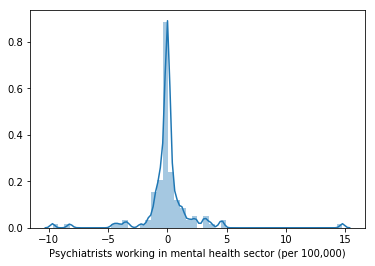

In [769]:
# lets make a histogram of the differences in data 

sns.distplot(psych_data_diff.iloc[1,:].dropna())

Most of the countries had no difference! Some of them even lost psychiatrists. Why? Were there too many psychiatrists?

Text(0.5,1,'Psychiatrists Working in 2011 (per 100,000)')

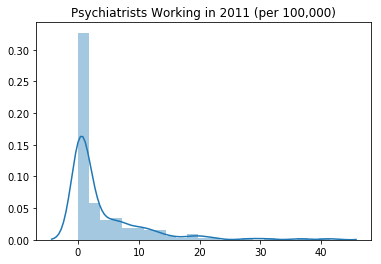

In [1009]:
# lets see how many psychiatrists per 100,000 people countries had in 2011

sns.distplot(psych_data.T.iloc[:,1].dropna().values.astype(float)).set_title("Psychiatrists Working in 2011 (per 100,000)")

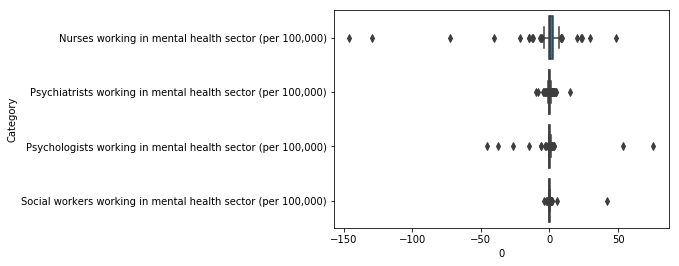

In [910]:
stack_psych = psych_data_diff.stack().to_frame().reset_index()

stack_psych.sort_values(0, ascending=False)

stack_psych[stack_psych[0] < 150].max()

sns.boxplot(x=0, y='Category', data=stack_psych)

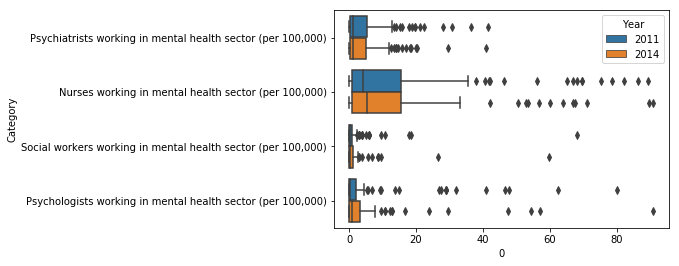

In [996]:
total_stack_psych = psych_data.stack().to_frame().reset_index()
total_stack_psych[0] = psych_data.stack().to_frame().reset_index()[0].astype(float)

sns.boxplot(x=0, y='Category', hue='Year', data=total_stack_psych[total_stack_psych[0] <100])

In [915]:
stack_psych[stack_psych['Category'].str.contains('Nurses')].sort_values(0).head(5)

Category      level_1       0
40  Nurses working in mental health sector (per 10...      Liberia -145.98
52  Nurses working in mental health sector (per 10...  Netherlands -129.39
93  Nurses working in mental health sector (per 10...     Viet Nam  -72.42
42  Nurses working in mental health sector (per 10...     Maldives  -40.46
16  Nurses working in mental health sector (per 10...       Cyprus  -21.62

[(-5, 40), (-5, 40)]

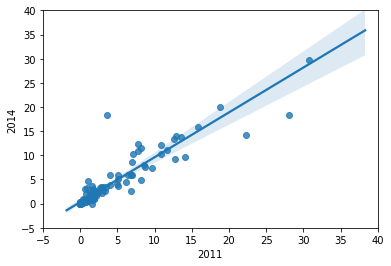

In [998]:
compare_psych = psych_data.T.iloc[:,0:2].T.swaplevel(
                ).reset_index(level=1).drop('Category', axis=1).T.dropna(how='any')

sns.regplot(x=compare_psych[2011].astype(float), y=compare_psych[2014].astype(float)).set(xlim=(-5, 40), ylim=(-5, 40))

# Summary and Python II

In the second part of our three-part Python series, we've learned about variables, data structures, functions, and graphing. While we have introduced these topics in the context of data science with Python, they are central to programming in any language and in any context. We have also laid the foundation for programmatically obtaining, cleaning, and visualizing data sets.

Now that we have an understanding of how to obtain and visualize some simple statistical information contained in a dataset, we've set the stage for machine learning and data analysis. These topics will be covered in depth in our next workshop, Python II.

Please fill out the post workshop survey posted on the Facebook event page!

Don't forget about our next workshop, Python 2, and our upcoming workshops this semester, including the R workshop series, sports data analysis in R, Data Visualization in Python, and more!